# Modeling

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm

## 1. Import necessary data (provided from the cleaning jupyter notebook)

In [2]:
wX_train = pd.read_csv("wXtrain.csv")
wX_val = pd.read_csv("wXval.csv")
wX_test = pd.read_csv("wXtest.csv")

wy_train = pd.read_csv("wytrain.csv")
wy_val = pd.read_csv("wyval.csv")
wy_test = pd.read_csv("wytest.csv")

mX_train = pd.read_csv("mXtrain.csv")
mX_val = pd.read_csv("mXval.csv")
mX_test = pd.read_csv("mXtest.csv")

my_train = pd.read_csv("mytrain.csv")
my_val = pd.read_csv("myval.csv")
my_test = pd.read_csv("mytest.csv")

## 2. Logistic Regression - feature importance

### Men

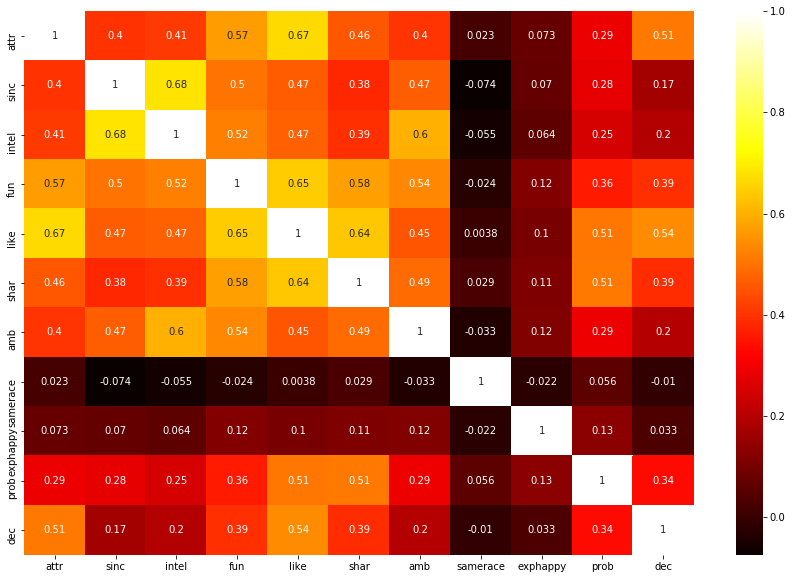

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
corr = mX_train.copy()
corr["dec"] = my_train["dec"]
sns.heatmap(corr.corr(), annot=True, cmap="hot")

In [4]:
traits = sm.Logit(my_train, mX_train)
results_traits = traits.fit()
results_traits.summary()

Optimization terminated successfully.
         Current function value: 0.511039
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dec   No. Observations:                 1978
Model:                          Logit   Df Residuals:                     1968
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.2624
Time:                        09:31:00   Log-Likelihood:                -1010.8
converged:                       True   LL-Null:                       -1370.5
Covariance Type:            nonrobust   LLR p-value:                4.777e-149
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.4048      0.044      9.187      0.000       0.318       0.491
sinc          -0.4102      0.052     -7.838      0.000      -0.513      -0.308
intel         -0.2765      0.057     -4.881      0.000      -0.388      -0.165
fun            0.1249      0.047      2.674      0.007       0.033       0.216
like           0.5607      0.061      9.228      0.000       0.442       0.680
shar           0.1304      0.038      3.417      0.001       0.056       0.205
amb           -0.2266      0.047     -4.872      0.000      -0.318      -0.135
samerace      -0.4956      0.111     -4.460      0.000      -0.713      -0.278
exphappy      -0.2856      0.031     -9.120      0.000      -0.347      -0.224
prob           0.1245      0.033      3.761      0.000       0.060       0.189
==============================================================================
"""

### Women

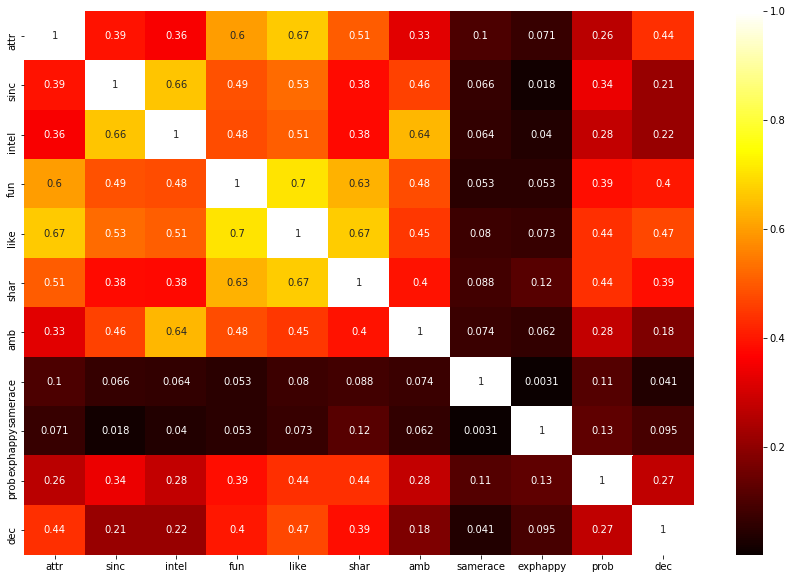

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))
corr = wX_train.copy()
corr["dec"] = wy_train["dec"]
sns.heatmap(corr.corr(), annot=True, cmap="hot")

In [6]:
traits = sm.Logit(wy_train, wX_train)
results_traits = traits.fit()
results_traits.summary()

Optimization terminated successfully.
         Current function value: 0.563789
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dec   No. Observations:                 1871
Model:                          Logit   Df Residuals:                     1861
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.1458
Time:                        09:31:01   Log-Likelihood:                -1054.8
converged:                       True   LL-Null:                       -1234.9
Covariance Type:            nonrobust   LLR p-value:                 4.492e-72
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.1759      0.038      4.689      0.000       0.102       0.249
sinc          -0.2002      0.044     -4.587      0.000      -0.286      -0.115
intel         -0.2823      0.052     -5.446      0.000      -0.384      -0.181
fun            0.1455      0.043      3.364      0.001       0.061       0.230
like           0.4204      0.054      7.830      0.000       0.315       0.526
shar           0.1259      0.036      3.459      0.001       0.055       0.197
amb           -0.2141      0.042     -5.144      0.000      -0.296      -0.133
samerace      -0.1509      0.109     -1.387      0.166      -0.364       0.062
exphappy      -0.1666      0.028     -5.866      0.000      -0.222      -0.111
prob           0.0410      0.030      1.386      0.166      -0.017       0.099
==============================================================================
"""

## 3. Comparison of Classifiers

In [8]:
def train_val_score(X_train, y_train, X_val, y_val, model):
    '''
    Train and Scores
    '''
    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    scores = (accuracy_score(y_val, y_hat), 
             precision_score(y_val, y_hat), 
             recall_score(y_val, y_hat))
    return scores

In [9]:
def test_score(X_test,y_test, model):
    '''
    Test Score
    '''
    y_hat = model.predict(X_test)
    scores = (
            accuracy_score(y_test, y_hat), 
             precision_score(y_test, y_hat), 
             recall_score(y_test, y_hat),
             confusion_matrix(y_test, y_hat)
             )
    return scores

### Women

In [10]:
model_lr = LogisticRegression()

model_svc = svm.SVC(kernel='rbf', C=2)

model_nn = MLPClassifier(max_iter=10000, early_stopping=True, learning_rate="adaptive", 
                      hidden_layer_sizes=(100,), learning_rate_init=1e-1)

model_rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=6)

model_nb = GaussianNB()

model_nc = KNeighborsClassifier(5)

In [11]:
score_lr = train_val_score(wX_train, wy_train.to_numpy().reshape(wX_train.shape[0]), 
                           wX_val, wy_val.to_numpy().reshape(wX_val.shape[0]),
                            model_lr)

score_svc = train_val_score(wX_train, wy_train.to_numpy().reshape(wX_train.shape[0]), 
                           wX_val, wy_val.to_numpy().reshape(wX_val.shape[0]),
                            model_svc)

score_nn = train_val_score(wX_train, wy_train.to_numpy().reshape(wX_train.shape[0]), 
                           wX_val, wy_val.to_numpy().reshape(wX_val.shape[0]),
                            model_nn)

score_rf = train_val_score(wX_train, wy_train.to_numpy().reshape(wX_train.shape[0]), 
                           wX_val, wy_val.to_numpy().reshape(wX_val.shape[0]),
                            model_rf)

score_nb = train_val_score(wX_train, wy_train.to_numpy().reshape(wX_train.shape[0]), 
                           wX_val, wy_val.to_numpy().reshape(wX_val.shape[0]), 
                            model_nb)

score_nc = train_val_score(wX_train, wy_train.to_numpy().reshape(wX_train.shape[0]), 
                           wX_val, wy_val.to_numpy().reshape(wX_val.shape[0]), 
                            model_nc)

print(f"Score Logistic Regression: Mean Accuracy: {round(score_lr[0],4)}")
print(f"Score Logistic Regression: Mean Precision: {round(score_lr[1],4)}")
print(f"Score Logistic Regression: Mean Recall: {round(score_lr[2],4)}")
print("\n --- \n")

print(f"Score Support Vector Classifier: Mean Accuracy: {round(score_svc[0],4)}")
print(f"Score Support Vector Classifier: Mean Precision: {round(score_svc[1],4)}")
print(f"Score Support Vector Classifier: Mean Recall: {round(score_svc[2],4)}")
print("\n --- \n")

print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Accuracy: {round(score_nn[0],4)}")
print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Precision:  {round(score_nn[1],4)}")
print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Recall: {round(score_nn[2],4)}")
print("\n --- \n")

print(f"Random Forest: Accuracy: {round(score_rf[0],4)}")
print(f"Random Forest: Precision:  {round(score_rf[1],4)}")
print(f"Random Forest: Recall: {round(score_rf[2],4)}")
print("\n --- \n")

print(f"Naive Bayes: Accuracy: {round(score_nb[0],4)}")
print(f"Naive Bayes: Precision: {round(score_nb[1],4)}")
print(f"Naive Bayes: Recall: {round(score_nb[2],4)}")
print("\n --- \n")

print(f"Nearest Neighbor: Accuracy: {round(score_nc[0],4)}")
print(f"Nearest Neighbor: Precision: {round(score_nc[1],4)}")
print(f"Nearest Neighbor: Recall: {round(score_nc[2],4)}")

Score Logistic Regression: Mean Accuracy: 0.7756
Score Logistic Regression: Mean Precision: 0.7254
Score Logistic Regression: Mean Recall: 0.6688

 --- 

Score Support Vector Classifier: Mean Accuracy: 0.7693
Score Support Vector Classifier: Mean Precision: 0.7286
Score Support Vector Classifier: Mean Recall: 0.6364

 --- 

Score Multi Layer Perceptron (1 Hidden Layer): Mean Accuracy: 0.7307
Score Multi Layer Perceptron (1 Hidden Layer): Mean Precision:  0.7706
Score Multi Layer Perceptron (1 Hidden Layer): Mean Recall: 0.4253

 --- 

Random Forest: Accuracy: 0.7656
Random Forest: Precision:  0.7113
Random Forest: Recall: 0.6558

 --- 

Naive Bayes: Accuracy: 0.7232
Naive Bayes: Precision: 0.6091
Naive Bayes: Recall: 0.7792

 --- 

Nearest Neighbor: Accuracy: 0.7469
Nearest Neighbor: Precision: 0.6855
Nearest Neighbor: Recall: 0.6299


In [12]:
score_test = test_score(wX_test, wy_test.to_numpy().reshape(wX_test.shape[0]),
                            model_lr)

print(f"Score Test: Accuracy: {round(score_test[0],2)}")
print(f"Score Test: Precision: {round(score_test[1],2)}")
print(f"Score Test: Recall: {round(score_test[2],2)}")

print(3*"---")

print(f"Confusion Matrix: {score_test[3]}")

Score Test: Accuracy: 0.78
Score Test: Precision: 0.72
Score Test: Recall: 0.65
---------
Confusion Matrix: [[358  63]
 [ 87 161]]


### Men

In [13]:
model_lr = LogisticRegression()

model_svc = svm.SVC(kernel='rbf', C=2)

model_nn = MLPClassifier(max_iter=10000, early_stopping=True, learning_rate="adaptive", 
                      hidden_layer_sizes=(100,), learning_rate_init=1e-1)

model_rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=6)

model_nb = GaussianNB()

model_nc = KNeighborsClassifier(5)

In [14]:
score_lr = train_val_score(mX_train, my_train.to_numpy().reshape(mX_train.shape[0]), 
                           mX_val, my_val.to_numpy().reshape(mX_val.shape[0]),
                            model_lr)

score_svc = train_val_score(mX_train, my_train.to_numpy().reshape(mX_train.shape[0]), 
                           mX_val, my_val.to_numpy().reshape(mX_val.shape[0]),
                            model_svc)

score_nn = train_val_score(mX_train, my_train.to_numpy().reshape(mX_train.shape[0]), 
                           mX_val, my_val.to_numpy().reshape(mX_val.shape[0]),
                            model_nn)

score_rf = train_val_score(mX_train, my_train.to_numpy().reshape(mX_train.shape[0]), 
                           mX_val, my_val.to_numpy().reshape(mX_val.shape[0]),
                            model_rf)

score_nb = train_val_score(mX_train, my_train.to_numpy().reshape(mX_train.shape[0]), 
                           mX_val, my_val.to_numpy().reshape(mX_val.shape[0]),
                            model_nb)

score_nc = train_val_score(mX_train, my_train.to_numpy().reshape(mX_train.shape[0]), 
                           mX_val, my_val.to_numpy().reshape(mX_val.shape[0]),
                            model_nc)

print(f"Score Logistic Regression: Mean Accuracy: {round(score_lr[0],4)}")
print(f"Score Logistic Regression: Mean Precision: {round(score_lr[1],4)}")
print(f"Score Logistic Regression: Mean Recall: {round(score_lr[2],4)}")
print("\n --- \n")

print(f"Score Support Vector Classifier: Mean Accuracy: {round(score_svc[0],4)}")
print(f"Score Support Vector Classifier: Mean Precision: {round(score_svc[1],4)}")
print(f"Score Support Vector Classifier: Mean Recall: {round(score_svc[2],4)}")
print("\n --- \n")

print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Accuracy: {round(score_nn[0],4)}")
print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Precision:  {round(score_nn[1],4)}")
print(f"Score Multi Layer Perceptron (1 Hidden Layer): Mean Recall: {round(score_nn[2],4)}")
print("\n --- \n")

print(f"Random Forest: Mean Accuracy: {round(score_rf[0],4)}")
print(f"Random Forest: Mean Precision:  {round(score_rf[1],4)}")
print(f"Random Forest: Mean Recall: {round(score_rf[2],4)}")
print("\n --- \n")

print(f"Naive Bayes: Mean Accuracy: {round(score_nb[0],4)}")
print(f"Naive Bayes: Mean Precision: {round(score_nb[1],4)}")
print(f"Naive Bayes: Mean Recall: {round(score_nb[2],4)}")
print("\n --- \n")

print(f"Nearest Neighbor: Mean Accuracy: {round(score_nc[0],4)}")
print(f"Nearest Neighbor: Mean Precision: {round(score_nc[1],4)}")
print(f"Nearest Neighbor: Mean Recall: {round(score_nc[2],4)}")

Score Logistic Regression: Mean Accuracy: 0.7656
Score Logistic Regression: Mean Precision: 0.7683
Score Logistic Regression: Mean Recall: 0.7518

 --- 

Score Support Vector Classifier: Mean Accuracy: 0.7739
Score Support Vector Classifier: Mean Precision: 0.7735
Score Support Vector Classifier: Mean Recall: 0.7661

 --- 

Score Multi Layer Perceptron (1 Hidden Layer): Mean Accuracy: 0.7079
Score Multi Layer Perceptron (1 Hidden Layer): Mean Precision:  0.6423
Score Multi Layer Perceptron (1 Hidden Layer): Mean Recall: 0.9212

 --- 

Random Forest: Mean Accuracy: 0.7656
Random Forest: Mean Precision:  0.7582
Random Forest: Mean Recall: 0.7709

 --- 

Naive Bayes: Mean Accuracy: 0.7373
Naive Bayes: Mean Precision: 0.7197
Naive Bayes: Mean Recall: 0.7661

 --- 

Nearest Neighbor: Mean Accuracy: 0.7432
Nearest Neighbor: Mean Precision: 0.7269
Nearest Neighbor: Mean Recall: 0.7685


In [15]:
score_test = test_score(wX_test, wy_test.to_numpy().reshape(wX_test.shape[0]),
                            model_lr)

print(f"Score Test: Accuracy: {round(score_test[0],2)}")
print(f"Score Test: Precision: {round(score_test[1],2)}")
print(f"Score Test: Recall: {round(score_test[2],2)}")

print(3*"---")

print(f"Confusion Matrix: {score_test[3]}")

Score Test: Accuracy: 0.74
Score Test: Precision: 0.64
Score Test: Recall: 0.73
---------
Confusion Matrix: [[317 104]
 [ 67 181]]
